# Machine Learning Approaches for Anomaly Detection in Medical Devices

In [1]:
# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ModuleNotFoundError: No module named 'xgboost'

In [15]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Importing Dataset

In [16]:
dataset=pd.read_csv("Dataset.csv")

In [19]:
dataset

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,1056758,0,42328,856,0,0,0,50394,184552,2116260,...,713608,1750894,4054554,4096660,2295880,220478,482,0,0,pos
1,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,269976,638838,1358354,819918,262804,2824,0,0,0,pos
2,43482,0,1534,1388,0,0,0,0,40024,493856,...,121166,202272,232636,645690,50,0,0,0,0,pos
3,199350,0,468,58,0,0,0,0,0,100714,...,95380,237386,479518,899682,615538,7440,180,0,0,pos
4,892422,2,1342,1100,0,0,0,2716,656148,6846624,...,1980134,5102372,7882256,14095922,6605678,206190,774,0,0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,18,0,2130706432,18,0,0,0,0,0,0,...,16,34,22,86,10,0,0,0,0,neg
6860,562,0,4,4,0,0,0,0,0,0,...,644,1110,526,1162,14756,128,0,0,0,neg
6861,14,0,2,2,0,0,0,0,0,408,...,44,80,52,54,0,0,0,0,0,neg
6862,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg


In [20]:
dataset.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,1056758,0,42328,856,0,0,0,50394,184552,2116260,...,713608,1750894,4054554,4096660,2295880,220478,482,0,0,pos
1,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,269976,638838,1358354,819918,262804,2824,0,0,0,pos
2,43482,0,1534,1388,0,0,0,0,40024,493856,...,121166,202272,232636,645690,50,0,0,0,0,pos
3,199350,0,468,58,0,0,0,0,0,100714,...,95380,237386,479518,899682,615538,7440,180,0,0,pos
4,892422,2,1342,1100,0,0,0,2716,656148,6846624,...,1980134,5102372,7882256,14095922,6605678,206190,774,0,0,pos


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Columns: 171 entries, aa_000 to class
dtypes: float64(5), int64(165), object(1)
memory usage: 9.0+ MB


In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_008    0
ee_009    0
ef_000    0
eg_000    0
class     0
Length: 171, dtype: int64

In [10]:
dataset.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.864000e+03,6864.000000,6.864000e+03,6864.000000,6864.000000,6864.000000,6864.000000,6.864000e+03,6.864000e+03,6.864000e+03,...,6.864000e+03,6.864000e+03,6.864000e+03,6.864000e+03,6.864000e+03,6.864000e+03,6.864000e+03,6864.000000,6864.000000,6864.000000
mean,3.369384e+04,0.593531,4.563140e+08,152.056527,25.398893,35.653263,14.168124,8.696815e+02,8.894451e+03,9.403061e+04,...,1.262279e+05,5.926716e+04,1.124677e+05,1.491235e+05,2.404894e+05,2.411094e+05,6.047143e+03,15.262238,0.296037,0.485723
std,1.217550e+05,2.106931,8.741623e+08,718.901002,387.144225,412.935117,733.383331,2.132106e+04,1.125484e+05,6.232640e+05,...,4.910512e+05,2.366151e+05,4.511586e+05,7.769018e+05,1.029452e+06,1.242970e+06,4.079957e+04,224.348803,7.103228,8.992044
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.600000e+01,0.000000,1.200000e+01,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,1.360000e+02,3.000000e+01,4.800000e+01,3.400000e+01,3.400000e+01,6.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,3.510000e+02,0.000000,4.000000e+01,24.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,1.469000e+03,4.540000e+02,8.190000e+02,7.870000e+02,7.830000e+02,8.550000e+02,0.000000e+00,0.000000,0.000000,0.000000
75%,3.337000e+03,0.000000,9.490000e+02,64.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.848000e+03,...,8.668500e+03,4.197500e+03,9.950000e+03,1.339300e+04,1.676200e+04,2.816000e+04,1.960000e+02,0.000000,0.000000,0.000000
max,1.445222e+06,68.000000,2.130707e+09,31442.000000,21050.000000,20070.000000,58270.000000,1.467566e+06,3.864894e+06,2.039930e+07,...,1.170577e+07,4.881404e+06,1.042391e+07,2.043519e+07,2.680975e+07,2.605551e+07,1.425382e+06,10418.000000,350.000000,606.000000


C:\Users\srini\AppData\Local\Temp\ipykernel_12740\2109838581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=dataset, palette="Set3")


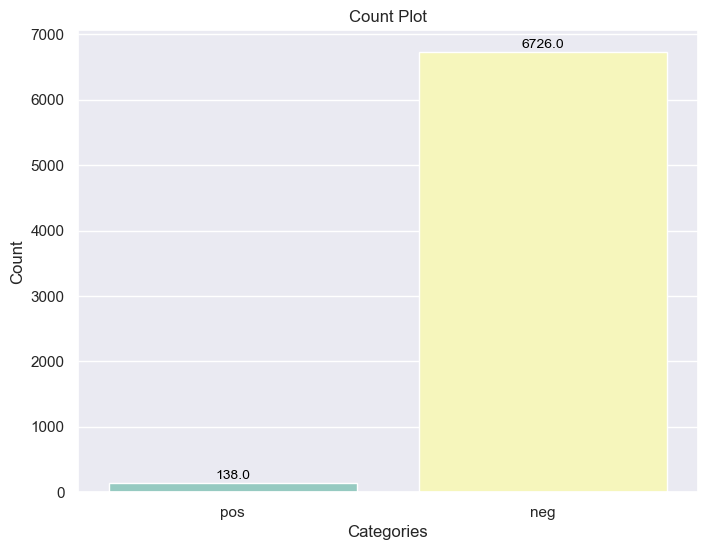

In [11]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x='class', data=dataset, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [ ]:
# Converting object type to int type

In [ ]:
le= LabelEncoder()
dataset['class']=  le.fit_transform(dataset['class'])

In [ ]:
dataset

In [ ]:
#Defining Dependent and independent variables

In [ ]:
X=dataset.iloc[:,0:170]

In [ ]:
X

In [ ]:
y=dataset.iloc[:,-1]

In [ ]:
y

In [ ]:
#Datasplitting

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
#Building a ML Model

In [ ]:
labels=['POSITIVE','NEGATIVE']

In [ ]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [ ]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Logistic Regression

In [ ]:
if os.path.exists('Logistic Regression.pkl'):
    # Load the trained model from the file
    clf = joblib.load('Logistic Regression.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'Logistic Regression.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)

# XGBoost Classifier

In [30]:
# Check if the model files exist
if os.path.exists('XGBClassifier.pkl'):
    # Load the trained model from the file
    clf = joblib.load('XGBClassifier.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("XGBoost Classifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = XGBClassifier(max_depth=100, random_state=0)
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'XGBClassifier.pkl') 
    print("Model saved successfuly.")
    predict = clf.predict(X_test)
    calculateMetrics("XGBoostClassifier", predict, y_test)

NameError: name 'os' is not defined

In [ ]:
#showing all algorithms performance values
columns = ["Algorithm Name","Accuracy","Precison","Recall","FScore"]
values = []
algorithm_names = ["Logistic Regression", "XGBoostClassifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],accuracy[i],precision[i],recall[i],fscore[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

In [31]:
# prediction

In [32]:
test=pd.read_csv("test.csv")

In [33]:
test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1056758,0,42328,856,0,0,0,50394,184552,2116260,...,1450086,713608,1750894,4054554,4096660,2295880,220478,482,0,0
1,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
2,43482,0,1534,1388,0,0,0,0,40024,493856,...,497196,121166,202272,232636,645690,50,0,0,0,0
3,199350,0,468,58,0,0,0,0,0,100714,...,282224,95380,237386,479518,899682,615538,7440,180,0,0
4,892422,2,1342,1100,0,0,0,2716,656148,6846624,...,3500996,1980134,5102372,7882256,14095922,6605678,206190,774,0,0
5,176346,0,6982,5922,0,0,0,0,65836,1630616,...,2428526,720862,1189150,1710512,1018248,626354,32208,0,0,0
6,959094,2,288,266,0,0,0,0,0,0,...,790862,256590,566132,1192120,86112,16760,3794,0,0,0
7,460990,0,3322,212,0,0,0,1094,63812,911674,...,864476,336864,820060,1116896,2489538,1271120,41198,20,0,0
8,45416,0,68,2,0,0,0,0,0,0,...,120030,47032,101160,183258,219370,1165836,44012,0,0,0
9,30,0,50,28,0,0,0,0,0,0,...,2372,696,450,468,34,166,0,0,0,0


In [34]:

# Make predictions on the selected test data
predict = clf.predict(test)

# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i])
        print("Row {}:************************************************** POSITIVE".format(i))
        
    else:
        print(test.iloc[i])
        print("Row {}:************************************************** NEGATIVE".format(i))
        


NameError: name 'clf' is not defined

In [ ]:
test['Predicted']=predict

In [35]:
test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1056758,0,42328,856,0,0,0,50394,184552,2116260,...,1450086,713608,1750894,4054554,4096660,2295880,220478,482,0,0
1,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
2,43482,0,1534,1388,0,0,0,0,40024,493856,...,497196,121166,202272,232636,645690,50,0,0,0,0
3,199350,0,468,58,0,0,0,0,0,100714,...,282224,95380,237386,479518,899682,615538,7440,180,0,0
4,892422,2,1342,1100,0,0,0,2716,656148,6846624,...,3500996,1980134,5102372,7882256,14095922,6605678,206190,774,0,0
5,176346,0,6982,5922,0,0,0,0,65836,1630616,...,2428526,720862,1189150,1710512,1018248,626354,32208,0,0,0
6,959094,2,288,266,0,0,0,0,0,0,...,790862,256590,566132,1192120,86112,16760,3794,0,0,0
7,460990,0,3322,212,0,0,0,1094,63812,911674,...,864476,336864,820060,1116896,2489538,1271120,41198,20,0,0
8,45416,0,68,2,0,0,0,0,0,0,...,120030,47032,101160,183258,219370,1165836,44012,0,0,0
9,30,0,50,28,0,0,0,0,0,0,...,2372,696,450,468,34,166,0,0,0,0
